In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.model_selection import train_test_split

import tensorflow as tf

# READ DATA

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/age_gender.csv')

# DATA PROCESSING

In [5]:
data = data.drop('img_name', axis=1)

In [6]:
data['age'] = pd.qcut(data['age'], q=10, labels=[0, 1, 2, 3,4,5,6,7,8,9])

In [7]:
np.sqrt(len(data['pixels'][0].split(' ')))

48.0

In [8]:
num_pixels = 2304
img_height = 48
img_width = 48

In [9]:
target_columns = ['gender', 'ethnicity', 'age']

y = data[target_columns]
X = data.drop(target_columns, axis=1)

# RESHAPE X

In [10]:
X = data['pixels'].str.split(' ', expand=True)

In [11]:
X = np.array(X).astype(int)
X = np.array([a.reshape(48, 48) for a in X])

In [12]:
X.shape

(23705, 48, 48)

# Training

In [13]:
y_gender = np.array(y['gender'])
y_ethnicity = np.array(y['ethnicity'])
y_age = np.array(y['age'])

In [14]:
len(y_ethnicity)

23705

## Model Def

In [15]:
def build_model(num_classes, activation, loss):
    
    inputs = tf.keras.Input(shape=(img_height, img_width, 1))
    x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs)
    x = tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu')(x)
    x = tf.keras.layers.MaxPooling2D()(x)
    x = tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu')(x)
    x = tf.keras.layers.MaxPooling2D()(x)
    x = tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu')(x)
    x = tf.keras.layers.MaxPooling2D()(x)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(128, activation='relu')(x)
    outputs = tf.keras.layers.Dense(num_classes, activation=activation)(x)
    
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    
    
    model.compile(
        optimizer='adam',
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [16]:
{column: list(data[column].unique()) for column in ['gender', 'ethnicity', 'age']}

{'age': [0, 1, 9, 2, 3, 4, 5, 6, 7, 8],
 'ethnicity': [2, 3, 4, 0, 1],
 'gender': [0, 1]}

In [17]:
X_gender_train, X_gender_test, y_gender_train, y_gender_test = train_test_split(X, y_gender, train_size=0.7)
X_ethnicity_train, X_ethnicity_test, y_ethnicity_train, y_ethnicity_test = train_test_split(X, y_ethnicity, train_size=0.7)
X_age_train, X_age_test, y_age_train, y_age_test = train_test_split(X, y_age, train_size=0.7)

## Ethnicity Training Fix Loss: binary_crossentropy (NOT WORKING)

## Ethnicity Training Fix Loss: sparse_categorical_crossentropy

## Activation: sigmoid, Loss: sparse_categorical_crossentropy

223/223 [==============================] - 1s 5ms/step - loss: 0.9058 - accuracy: 0.6745


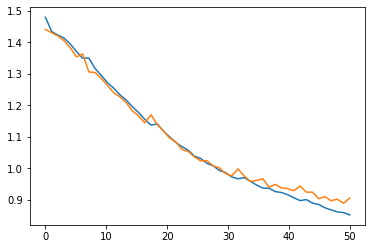

In [18]:
ethnicity_model = build_model(5, activation='sigmoid', loss='sparse_categorical_crossentropy')

ethnicity_history = ethnicity_model.fit(
    X_ethnicity_train,
    y_ethnicity_train,
    validation_split=0.2,
    batch_size=5000,
    epochs=50,
    callbacks=[tf.keras.callbacks.ReduceLROnPlateau()],
    verbose=0
)

x = np.linspace(0, 50, 50)
plt.plot(x, ethnicity_history.history['loss'])
plt.plot(x, ethnicity_history.history['val_loss'])

ethnicity_acc = ethnicity_model.evaluate(X_ethnicity_test, y_ethnicity_test)[1]

## Activation: softmax, Loss: sparse_categorical_crossentropy

223/223 [==============================] - 1s 5ms/step - loss: 0.8470 - accuracy: 0.6981


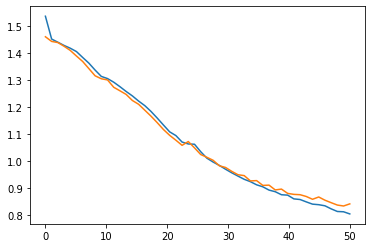

In [19]:
ethnicity_model = build_model(5, activation='softmax', loss='sparse_categorical_crossentropy')

ethnicity_history = ethnicity_model.fit(
    X_ethnicity_train,
    y_ethnicity_train,
    validation_split=0.2,
    batch_size=5000,
    epochs=50,
    callbacks=[tf.keras.callbacks.ReduceLROnPlateau()],
    verbose=0
)

x = np.linspace(0, 50, 50)
plt.plot(x, ethnicity_history.history['loss'])
plt.plot(x, ethnicity_history.history['val_loss'])

ethnicity_acc = ethnicity_model.evaluate(X_ethnicity_test, y_ethnicity_test)[1]

## Activation: relu, Loss: sparse_categorical_crossentropy

223/223 [==============================] - 1s 5ms/step - loss: 4.5070 - accuracy: 0.1714


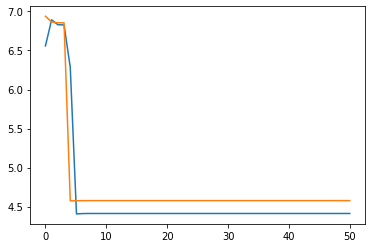

In [20]:
ethnicity_model = build_model(5, activation='relu', loss='sparse_categorical_crossentropy')

ethnicity_history = ethnicity_model.fit(
    X_ethnicity_train,
    y_ethnicity_train,
    validation_split=0.2,
    batch_size=5000,
    epochs=50,
    callbacks=[tf.keras.callbacks.ReduceLROnPlateau()],
    verbose=0
)

x = np.linspace(0, 50, 50)
plt.plot(x, ethnicity_history.history['loss'])
plt.plot(x, ethnicity_history.history['val_loss'])

ethnicity_acc = ethnicity_model.evaluate(X_ethnicity_test, y_ethnicity_test)[1]

## Ethnicity Training Fix Loss: mean_squared_error

## Activation: sigmoid, Loss: mean_squared_error

In [21]:
ethnicity_model = build_model(5, activation='sigmoid', loss='mean_squared_error')

ethnicity_history = ethnicity_model.fit(
    X_ethnicity_train,
    y_ethnicity_train,
    validation_split=0.2,
    batch_size=5000,
    epochs=50,
    callbacks=[tf.keras.callbacks.ReduceLROnPlateau()],
    verbose=0
)
fig = px.line(
    ethnicity_history.history,
    y=['loss', 'val_loss'],
    labels={'index': "Epoch", 'value': "Loss"},
    title="Ethnicity Model sigmoid mean_squared_error"
)

fig.show()
ethnicity_acc = ethnicity_model.evaluate(X_ethnicity_test, y_ethnicity_test)[1]

223/223 [==============================] - 1s 4ms/step - loss: 1.9010 - accuracy: 0.4180


## Activation: softmax, Loss: mean_squared_error

223/223 [==============================] - 1s 4ms/step - loss: 3.0000 - accuracy: 0.2407


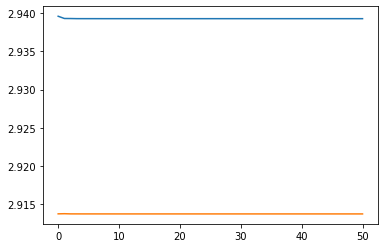

In [22]:
ethnicity_model = build_model(5, activation='softmax', loss='mean_squared_error')

ethnicity_history = ethnicity_model.fit(
    X_ethnicity_train,
    y_ethnicity_train,
    validation_split=0.2,
    batch_size=5000,
    epochs=50,
    callbacks=[tf.keras.callbacks.ReduceLROnPlateau()],
    verbose=0
)

x = np.linspace(0, 50, 50)
plt.plot(x, ethnicity_history.history['loss'])
plt.plot(x, ethnicity_history.history['val_loss'])

ethnicity_acc = ethnicity_model.evaluate(X_ethnicity_test, y_ethnicity_test)[1]

## Activation: relu, Loss: mean_squared_error

223/223 [==============================] - 1s 5ms/step - loss: 2.1951 - accuracy: 0.1443


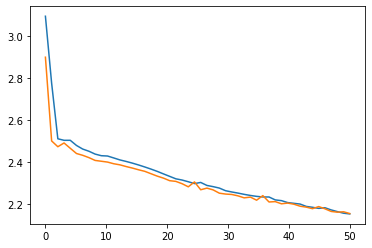

In [23]:
ethnicity_model = build_model(5, activation='relu', loss='mean_squared_error')

ethnicity_history = ethnicity_model.fit(
    X_ethnicity_train,
    y_ethnicity_train,
    validation_split=0.2,
    batch_size=5000,
    epochs=50,
    callbacks=[tf.keras.callbacks.ReduceLROnPlateau()],
    verbose=0
)

x = np.linspace(0, 50, 50)
plt.plot(x, ethnicity_history.history['loss'])
plt.plot(x, ethnicity_history.history['val_loss'])

ethnicity_acc = ethnicity_model.evaluate(X_ethnicity_test, y_ethnicity_test)[1]

In [24]:
## Ethnicity Training Fix Loss: mean_squared_logarithmic_error

In [25]:
## Activation: sigmoid, Loss: mean_squared_logarithmic_error

223/223 [==============================] - 1s 5ms/step - loss: 0.3678 - accuracy: 0.4251


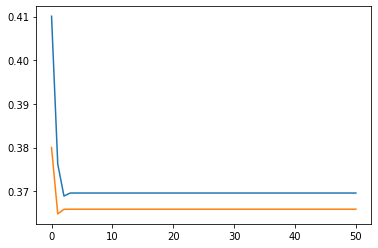

In [26]:
ethnicity_model = build_model(5, activation='sigmoid', loss='mean_squared_logarithmic_error')

ethnicity_history = ethnicity_model.fit(
    X_ethnicity_train,
    y_ethnicity_train,
    validation_split=0.2,
    batch_size=5000,
    epochs=50,
    callbacks=[tf.keras.callbacks.ReduceLROnPlateau()],
    verbose=0
)

x = np.linspace(0, 50, 50)
plt.plot(x, ethnicity_history.history['loss'])
plt.plot(x, ethnicity_history.history['val_loss'])

ethnicity_acc = ethnicity_model.evaluate(X_ethnicity_test, y_ethnicity_test)[1]

In [27]:
## Activation: softmax, Loss: mean_squared_logarithmic_error

223/223 [==============================] - 1s 5ms/step - loss: 0.5819 - accuracy: 0.1686


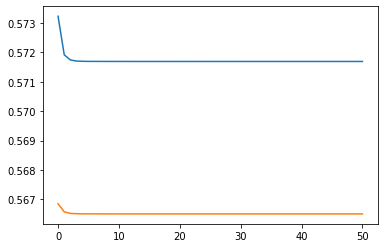

In [28]:
ethnicity_model = build_model(5, activation='softmax', loss='mean_squared_logarithmic_error')

ethnicity_history = ethnicity_model.fit(
    X_ethnicity_train,
    y_ethnicity_train,
    validation_split=0.2,
    batch_size=5000,
    epochs=50,
    callbacks=[tf.keras.callbacks.ReduceLROnPlateau()],
    verbose=0
)

x = np.linspace(0, 50, 50)
plt.plot(x, ethnicity_history.history['loss'])
plt.plot(x, ethnicity_history.history['val_loss'])

ethnicity_acc = ethnicity_model.evaluate(X_ethnicity_test, y_ethnicity_test)[1]

In [29]:
## Activation: relu, Loss: mean_squared_logarithmic_error

223/223 [==============================] - 1s 5ms/step - loss: 0.2586 - accuracy: 0.2406


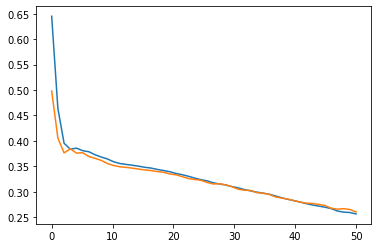

In [30]:
ethnicity_model = build_model(5, activation='relu', loss='mean_squared_logarithmic_error')

ethnicity_history = ethnicity_model.fit(
    X_ethnicity_train,
    y_ethnicity_train,
    validation_split=0.2,
    batch_size=5000,
    epochs=50,
    callbacks=[tf.keras.callbacks.ReduceLROnPlateau()],
    verbose=0
)

x = np.linspace(0, 50, 50)
plt.plot(x, ethnicity_history.history['loss'])
plt.plot(x, ethnicity_history.history['val_loss'])

ethnicity_acc = ethnicity_model.evaluate(X_ethnicity_test, y_ethnicity_test)[1]

In [31]:
## Ethnicity Training Fix Loss: mean_absolute_error

In [32]:
## Activation: sigmoid, Loss: mean_absolute_error

223/223 [==============================] - 1s 4ms/step - loss: 1.1229 - accuracy: 0.4180


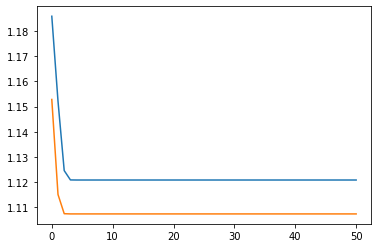

In [33]:
ethnicity_model = build_model(5, activation='sigmoid', loss='mean_absolute_error')

ethnicity_history = ethnicity_model.fit(
    X_ethnicity_train,
    y_ethnicity_train,
    validation_split=0.2,
    batch_size=5000,
    epochs=50,
    callbacks=[tf.keras.callbacks.ReduceLROnPlateau()],
    verbose=0
)

x = np.linspace(0, 50, 50)
plt.plot(x, ethnicity_history.history['loss'])
plt.plot(x, ethnicity_history.history['val_loss'])

ethnicity_acc = ethnicity_model.evaluate(X_ethnicity_test, y_ethnicity_test)[1]

In [34]:
## Activation: softmax, Loss: mean_absolute_error

223/223 [==============================] - 1s 4ms/step - loss: 1.2540 - accuracy: 0.1638


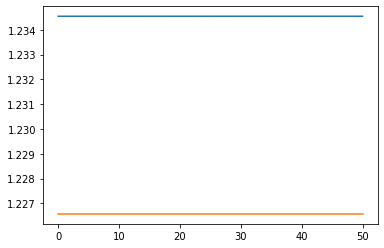

In [35]:
ethnicity_model = build_model(5, activation='softmax', loss='mean_absolute_error')

ethnicity_history = ethnicity_model.fit(
    X_ethnicity_train,
    y_ethnicity_train,
    validation_split=0.2,
    batch_size=5000,
    epochs=50,
    callbacks=[tf.keras.callbacks.ReduceLROnPlateau()],
    verbose=0
)

x = np.linspace(0, 50, 50)
plt.plot(x, ethnicity_history.history['loss'])
plt.plot(x, ethnicity_history.history['val_loss'])

ethnicity_acc = ethnicity_model.evaluate(X_ethnicity_test, y_ethnicity_test)[1]

In [36]:
## Activation: relu, Loss: mean_absolute_error

223/223 [==============================] - 1s 5ms/step - loss: 0.9128 - accuracy: 0.3280


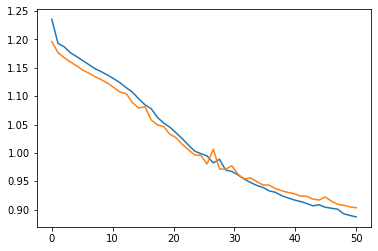

In [37]:
ethnicity_model = build_model(5, activation='relu', loss='mean_absolute_error')

ethnicity_history = ethnicity_model.fit(
    X_ethnicity_train,
    y_ethnicity_train,
    validation_split=0.2,
    batch_size=5000,
    epochs=50,
    callbacks=[tf.keras.callbacks.ReduceLROnPlateau()],
    verbose=0
)

x = np.linspace(0, 50, 50)
plt.plot(x, ethnicity_history.history['loss'])
plt.plot(x, ethnicity_history.history['val_loss'])

ethnicity_acc = ethnicity_model.evaluate(X_ethnicity_test, y_ethnicity_test)[1]

In [38]:
## Ethnicity Training Fix Loss: categorical_hinge

In [39]:
## Activation: sigmoid, Loss: categorical_hinge

223/223 [==============================] - 1s 5ms/step - loss: 0.4899 - accuracy: 0.1623


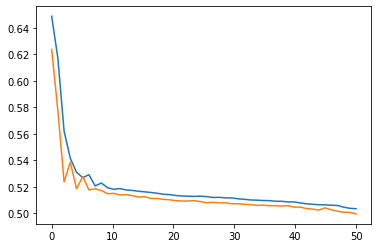

In [40]:
ethnicity_model = build_model(5, activation='sigmoid', loss='categorical_hinge')

ethnicity_history = ethnicity_model.fit(
    X_ethnicity_train,
    y_ethnicity_train,
    validation_split=0.2,
    batch_size=5000,
    epochs=50,
    callbacks=[tf.keras.callbacks.ReduceLROnPlateau()],
    verbose=0
)

x = np.linspace(0, 50, 50)
plt.plot(x, ethnicity_history.history['loss'])
plt.plot(x, ethnicity_history.history['val_loss'])

ethnicity_acc = ethnicity_model.evaluate(X_ethnicity_test, y_ethnicity_test)[1]

In [41]:
## Activation: softmax, Loss: categorical_hinge

223/223 [==============================] - 1s 5ms/step - loss: 0.5016 - accuracy: 0.2237


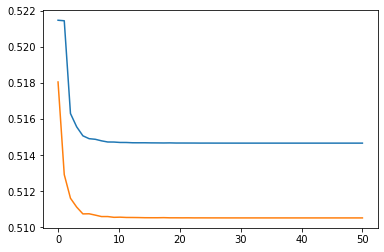

In [42]:
ethnicity_model = build_model(5, activation='softmax', loss='categorical_hinge')

ethnicity_history = ethnicity_model.fit(
    X_ethnicity_train,
    y_ethnicity_train,
    validation_split=0.2,
    batch_size=5000,
    epochs=50,
    callbacks=[tf.keras.callbacks.ReduceLROnPlateau()],
    verbose=0
)

x = np.linspace(0, 50, 50)
plt.plot(x, ethnicity_history.history['loss'])
plt.plot(x, ethnicity_history.history['val_loss'])

ethnicity_acc = ethnicity_model.evaluate(X_ethnicity_test, y_ethnicity_test)[1]

In [43]:
## Activation: relu, Loss: categorical_hinge

223/223 [==============================] - 1s 4ms/step - loss: 0.4937 - accuracy: 0.1150


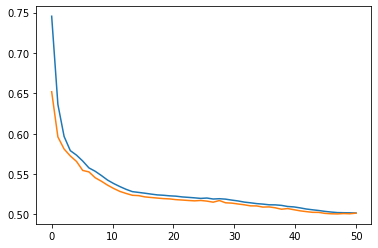

In [44]:
ethnicity_model = build_model(5, activation='relu', loss='categorical_hinge')

ethnicity_history = ethnicity_model.fit(
    X_ethnicity_train,
    y_ethnicity_train,
    validation_split=0.2,
    batch_size=5000,
    epochs=50,
    callbacks=[tf.keras.callbacks.ReduceLROnPlateau()],
    verbose=0
)

x = np.linspace(0, 50, 50)
plt.plot(x, ethnicity_history.history['loss'])
plt.plot(x, ethnicity_history.history['val_loss'])

ethnicity_acc = ethnicity_model.evaluate(X_ethnicity_test, y_ethnicity_test)[1]

In [45]:
## Ethnicity Training Fix Loss: logcosh

In [46]:
## Activation: sigmoid, Loss: logcosh

223/223 [==============================] - 1s 5ms/step - loss: 0.6386 - accuracy: 0.4177


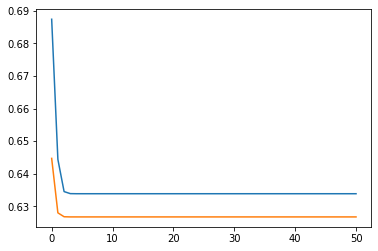

In [47]:
ethnicity_model = build_model(5, activation='sigmoid', loss='logcosh')

ethnicity_history = ethnicity_model.fit(
    X_ethnicity_train,
    y_ethnicity_train,
    validation_split=0.2,
    batch_size=5000,
    epochs=50,
    callbacks=[tf.keras.callbacks.ReduceLROnPlateau()],
    verbose=0
)

x = np.linspace(0, 50, 50)
plt.plot(x, ethnicity_history.history['loss'])
plt.plot(x, ethnicity_history.history['val_loss'])

ethnicity_acc = ethnicity_model.evaluate(X_ethnicity_test, y_ethnicity_test)[1]

In [48]:
## Activation: softmax, Loss: logcosh

223/223 [==============================] - 1s 5ms/step - loss: 0.8155 - accuracy: 0.1919


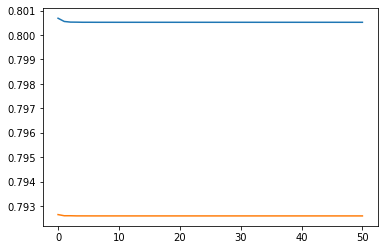

In [49]:
ethnicity_model = build_model(5, activation='softmax', loss='logcosh')

ethnicity_history = ethnicity_model.fit(
    X_ethnicity_train,
    y_ethnicity_train,
    validation_split=0.2,
    batch_size=5000,
    epochs=50,
    callbacks=[tf.keras.callbacks.ReduceLROnPlateau()],
    verbose=0
)

x = np.linspace(0, 50, 50)
plt.plot(x, ethnicity_history.history['loss'])
plt.plot(x, ethnicity_history.history['val_loss'])

ethnicity_acc = ethnicity_model.evaluate(X_ethnicity_test, y_ethnicity_test)[1]

In [50]:
## Activation: relu, Loss: logcosh

223/223 [==============================] - 1s 4ms/step - loss: 0.4535 - accuracy: 0.1905


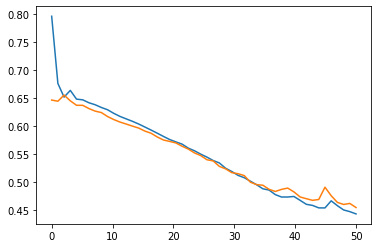

In [51]:
ethnicity_model = build_model(5, activation='relu', loss='logcosh')

ethnicity_history = ethnicity_model.fit(
    X_ethnicity_train,
    y_ethnicity_train,
    validation_split=0.2,
    batch_size=5000,
    epochs=50,
    callbacks=[tf.keras.callbacks.ReduceLROnPlateau()],
    verbose=0
)

x = np.linspace(0, 50, 50)
plt.plot(x, ethnicity_history.history['loss'])
plt.plot(x, ethnicity_history.history['val_loss'])

ethnicity_acc = ethnicity_model.evaluate(X_ethnicity_test, y_ethnicity_test)[1]